In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
# Importing reqired libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, roc_auc_score, roc_curve, precision_recall_curve, accuracy_score, confusion_matrix

**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [3]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [4]:
# Splitting the data into train and test data.
X = df['LIMIT_BAL'].values.reshape(-1, 1)
y = df['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [5]:
print('Shape of X_train data:', X_train.shape)
print('Shape of X_test data:', X_test.shape)
print('Shape of y_train data:', y_train.shape)
print('Shape of y_test data:', y_test.shape)

Shape of X_train data: (18664, 1)
Shape of X_test data: (8000, 1)
Shape of y_train data: (18664,)
Shape of y_test data: (8000,)


In [6]:
np.mean(y_train)

0.22112087441063008

In [7]:
np.mean(y_test)

0.223375

#### The positive class fractions in the training and testing data are both about 22%. This is good as these are same as the overall data and we can say that the training set is representative of the testing set.

In [8]:
log_model = LogisticRegression()

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [9]:
log_model.fit(X_train, y_train)

LogisticRegression()

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [10]:
y_pred = log_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Predicted probabilities for the testing samples.

In [11]:
y_pred_proba = log_model.predict_proba(X_test)
y_pred_proba

array([[0.83769936, 0.16230064],
       [0.961359  , 0.038641  ],
       [0.83769936, 0.16230064],
       ...,
       [0.96829877, 0.03170123],
       [0.77397722, 0.22602278],
       [0.77397722, 0.22602278]])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [12]:
roc_auc_score(y_test, y_pred_proba[:, 1])

0.6220890796064464

_________________________________________________________________________
**Now, plot the ROC curve.**


In [13]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba[:, 1])

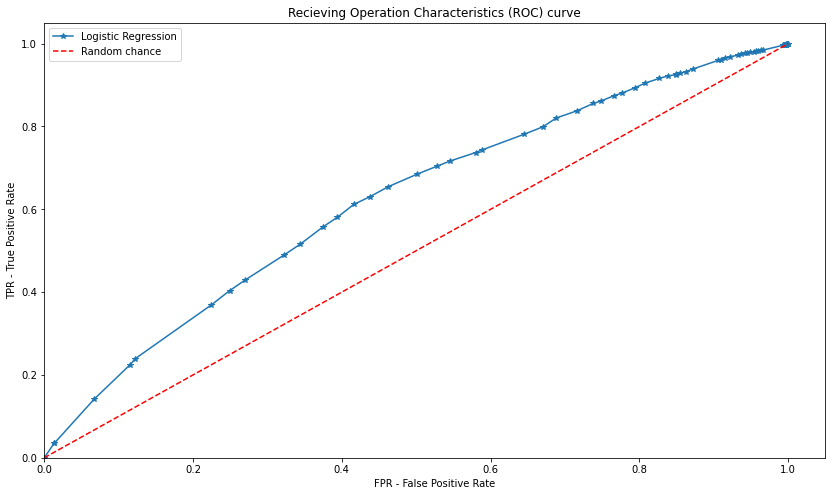

In [14]:
plt.figure(figsize = (14, 8))
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')

plt.legend(['Logistic Regression', 'Random chance'])
plt.xlabel('FPR - False Positive Rate')
plt.ylabel('TPR - True Positive Rate')
plt.xlim(left = 0)
plt.ylim(bottom = 0)
plt.title('Recieving Operation Characteristics (ROC) curve');

In [15]:
threshold

array([1.48291073, 0.48291073, 0.47267377, 0.46586135, 0.44889135,
       0.43203951, 0.41534352, 0.39883966, 0.38256247, 0.36654455,
       0.35081623, 0.33540546, 0.32033761, 0.30563537, 0.29131868,
       0.2774047 , 0.26390781, 0.25083963, 0.23820915, 0.22602278,
       0.21428447, 0.2029959 , 0.19215657, 0.18176403, 0.17181401,
       0.16230064, 0.15321657, 0.1445532 , 0.13630084, 0.12844886,
       0.12098585, 0.11389978, 0.10717814, 0.10080803, 0.09614624,
       0.09477634, 0.0890698 , 0.0836751 , 0.07857895, 0.07376818,
       0.06922982, 0.06495108, 0.06091949, 0.05712285, 0.05354933,
       0.05018747, 0.04702618, 0.04405478, 0.04126301, 0.038641  ,
       0.03617931, 0.03386893, 0.03170123, 0.02966801, 0.02776146,
       0.02597414, 0.02429902, 0.02272941, 0.01988175, 0.01859204,
       0.01738451, 0.0162541 , 0.01519607, 0.01420591, 0.0132794 ,
       0.00947018, 0.00588891, 0.00550181])

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [16]:
precision, recall, threshold1 = precision_recall_curve(y_test, y_pred_proba[:, 1])

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


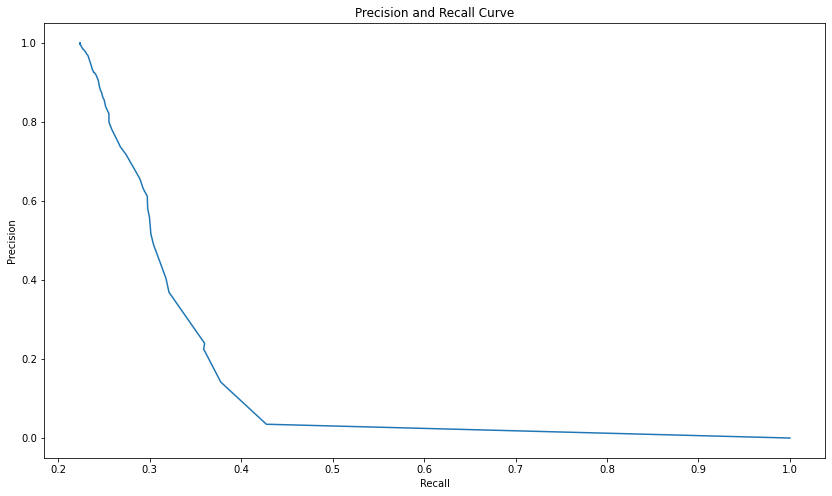

In [17]:
plt.figure(figsize = (14, 8))
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and Recall Curve');

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [18]:
auc(recall, precision)

0.3227662528898962

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [19]:
x_train_pred = log_model.predict(X_train)
x_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
x_train_pred_proba = log_model.predict_proba(X_train)
x_train_pred_proba

array([[0.93077018, 0.06922982],
       [0.70868132, 0.29131868],
       [0.7970041 , 0.2029959 ],
       ...,
       [0.7970041 , 0.2029959 ],
       [0.83769936, 0.16230064],
       [0.81823597, 0.18176403]])

In [21]:
roc_auc_score(y_train, x_train_pred_proba[:, 1])

0.6171969309899445